We have a set of images:

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.set_cmap('gray')

In [4]:
img = plt.imread('data/slide-0.png')

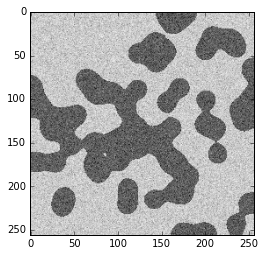

In [5]:
plt.imshow(img)

In [6]:
img.shape

(256, 256, 4)

In [7]:
img[:, :, 0]

array([[ 0.83137256,  0.81568629,  0.81176472, ...,  0.84313726,
         0.89019608,  0.8509804 ],
       [ 0.74901962,  0.89411765,  0.80784315, ...,  0.88235295,
         0.73725492,  0.75686276],
       [ 0.67843139,  0.81176472,  0.75294119, ...,  0.73333335,
         0.89411765,  0.71372551],
       ..., 
       [ 0.89803922,  0.6901961 ,  0.79215688, ...,  0.81568629,
         0.78039217,  0.81176472],
       [ 0.56862748,  0.87843138,  0.7647059 , ...,  0.74901962,
         0.77254903,  0.78431374],
       [ 0.73725492,  0.86666667,  0.89411765, ...,  0.82745099,
         0.85882354,  0.77254903]], dtype=float32)

In [8]:
img[:, :, 1]

array([[ 0.83137256,  0.81568629,  0.81176472, ...,  0.84313726,
         0.89019608,  0.8509804 ],
       [ 0.74901962,  0.89411765,  0.80784315, ...,  0.88235295,
         0.73725492,  0.75686276],
       [ 0.67843139,  0.81176472,  0.75294119, ...,  0.73333335,
         0.89411765,  0.71372551],
       ..., 
       [ 0.89803922,  0.6901961 ,  0.79215688, ...,  0.81568629,
         0.78039217,  0.81176472],
       [ 0.56862748,  0.87843138,  0.7647059 , ...,  0.74901962,
         0.77254903,  0.78431374],
       [ 0.73725492,  0.86666667,  0.89411765, ...,  0.82745099,
         0.85882354,  0.77254903]], dtype=float32)

In [9]:
img = img[:, :, 0]

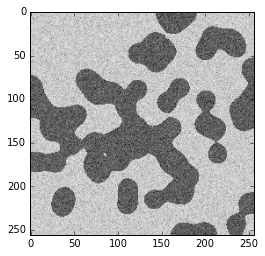

In [10]:
plt.imshow(img)

In [28]:
%%writefile micro.py
def specimen_ratio(img, threshold):
    specimen_area = 0
    N = len(img)
    for col in range(N):
        for row in range(N):
            value = img[row, col]
            if value > threshold:
                specimen_area = specimen_area + 1
    total_area = N*N
    return specimen_area/total_area

Overwriting micro.py


In [29]:
import micro
img = plt.imread('data/slide-0.png')
img = img[:, :, 0]
micro.specimen_ratio(img, 0.5)

0.6423187255859375

## Documenting

What is image? What is threshold? What stops us from trying to provide a 4-dimensional whatever

In [30]:
def specimen_ratio(img, threshold):
    """
    Parameters:
    ----------
    
    Returns:
    -------
    """
    specimen_area = 0
    N = len(img)
    for col in range(N):
        for row in range(N):
            value = img[row, col]
            if value > threshold:
                specimen_area = specimen_area + 1
    total_area = nrows*ncols
    return specimen_area/total_area

## Testing

### Exceptions

In [31]:
img = plt.imread('data/slide-0.png')
specimen_ratio(img, 0.5)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

That's a bad error. Let's try to fix it:

In [32]:
def specimen_ratio(img, threshold):
    """
    Parameters:
    ----------
    
    Returns:
    -------
    """
    specimen_area = 0
    if img.ndim != 2:
        raise ValueError("img must be a 2-D matrix")
    N = len(img)
    for col in range(N):
        for row in range(N):
            value = img[row, col]
            if value > threshold:
                specimen_area = specimen_area + 1
    total_area = N*N
    return specimen_area/total_area

In [33]:
img = plt.imread('data/slide-0.png')
specimen_ratio(img, 0.5)

ValueError: img must be a 2-D matrix

read more: https://docs.python.org/3/tutorial/errors.html

## Exercise: raise another valueError if threshold is not between 0 and 1. How to check if something is in between two values?

### Test cases

In [34]:
img_1 = np.zeros([2, 2])
img_1

array([[ 0.,  0.],
       [ 0.,  0.]])

In [35]:
img_2 = np.ones([2, 2])
img_2

array([[ 1.,  1.],
       [ 1.,  1.]])

In [36]:
img_3 = np.eye(2)*0.4
img_3

array([[ 0.4,  0. ],
       [ 0. ,  0.4]])

In [37]:
specimen_ratio(img_1, 0.5)

0.0

In [38]:
specimen_ratio(img_2, 0.5)

1.0

In [39]:
specimen_ratio(img_3, 0.5)

0.0

### Assertions

In [40]:
img_1 = np.zeros([2, 2])
img_2 = np.ones([2, 2])
img_3 = np.eye(2)

assert(micro.specimen_ratio(img_1, 0.5) == 0.0)
assert(micro.specimen_ratio(img_2, 0.5) == 1.0)
assert(micro.specimen_ratio(img_3, 0.5) == 0.5)

## Put your assertions in a file

In [109]:
import micro
import numpy as np

def test_all_zeros():
    img = np.zeros([2, 2])
    assert(micro.specimen_ratio(img, 0.5) == 0.0)

def test_all_ones():
    img = np.ones([2, 2])
    assert(micro.specimen_ratio(img, 0.5) == 1.0)

def test_half_ones():
    img = np.eye(2)
    assert(micro.specimen_ratio(img, 0.5) == 0.5)

def test_rectangular():
    img = np.zeros([2, 3])
    assert(micro.specimen_ratio(img, 0.5) == 0.0)

def test_rectangular_2():
    img = np.zeros([3, 2])
    assert(micro.specimen_ratio(img, 0.5) == 0.0)


## Run using py.test

In [108]:
!py.test

============================= test session starts ==============================
platform linux -- Python 3.5.2, pytest-3.0.3, py-1.4.31, pluggy-0.4.0
rootdir: /home/atrikut/intermediate-python-workshop, inifile: 
collected 5 items 

test_micro.py ....F

=================================== FAILURES ===================================
______________________________ test_rectangular_2 ______________________________

    def test_rectangular_2():
        img = np.zeros([3, 2])
>       assert(micro.specimen_ratio(img, 0.5) == 0.0)

test_micro.py:22: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

img = array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]]), threshold = 0.5

    def specimen_ratio(img, threshold):
        specimen_area = 0
        N = len(img)
        for i in range(N):
            for j in range(N):
>               value = img[i, j]
E               IndexError: index 2 is out of bounds for axis 1 with size 2

micro.py:6: IndexError
====

## Debugging

In [9]:
%debug
import micro
import numpy as np
img = np.zeros([3, 2])
micro.specimen_ratio(img, 0.5) == 0.0

> /home/atrikut/intermediate-python-workshop/micro.py(6)specimen_ratio()
      4     for i in range(N):
      5         for j in range(N):
----> 6             value = img[i, j]
      7             if value > threshold:
      8                 specimen_area = specimen_area + 1

ipdb> q


IndexError: index 2 is out of bounds for axis 1 with size 2

## Profiling

In [42]:
import matplotlib.pyplot as plt
img = plt.imread('data/slide-0.png')
img = img[:, :, 0]

In [44]:
import micro

In [45]:
%timeit micro.specimen_ratio(img, 0.5)

1 loop, best of 3: 304 ms per loop


In [16]:
!pip install snakeviz --user
!pip install line_profiler --user

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 71kB 1.3MB/s 
  Running setup.py bdist_wheel for line-profiler ... - \ | / - \ | / done
  Stored in directory: /home/atrikut/.cache/pip/wheels/a8/aa/3b/1d4570cc467313caec92c9d51e6543b598b835ab95cfe9c726
Successfully built line-profiler
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
%load_ext line_profiler

In [47]:
%lprun -f micro.specimen_ratio micro.specimen_ratio(img, threshold=0.5)

In [54]:
%reload_ext micro

In [65]:
import micro

In [66]:
%timeit micro.specimen_ratio(img, threshold=0.5)

1 loop, best of 3: 324 ms per loop


In [77]:
%timeit micro.specimen_ratio_improved(img, threshold=0.5)

1000 loops, best of 3: 301 µs per loop


In [76]:
import imp
imp.reload(micro)

<module 'micro' from '/home/atrikut/intermediate-python-workshop/micro.py'>

In [73]:
micro.specimen_ratio_improved

<function micro.specimen_ratio_improved>

In [ ]:
%tim